<a href="https://colab.research.google.com/github/sathwikareddy1/DA-using-python/blob/main/2203A52183_b_37_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


file_path = "/content/dermatology_database_1.csv"
data = pd.read_csv(file_path)


data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)


X = data.drop(columns=['class'])
y = data['class']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)


print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)


<ipython-input-12-4743f01cee26>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.7162162162162162
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       0.41      0.92      0.56        12
           3       1.00      0.93      0.97        15
           4       0.00      0.00      0.00        10
           5       1.00      0.10      0.18        10
           6       0.57      1.00      0.73         4

    accuracy                           0.72        74
   macro avg       0.65      0.66      0.57        74
weighted avg       0.72      0.72      0.65        74


Random Forest Accuracy: 0.9594594594594594
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import zscore


file_path = "dermatology_database_1.csv"
data = pd.read_csv(file_path)


data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)


def detect_outliers_zscore(data, threshold=3):
    z_scores = zscore(data)
    abs_z_scores = abs(z_scores)
    return (abs_z_scores > threshold).any(axis=1)


numeric_features = data.select_dtypes(include=['float64', 'int64'])
outliers = detect_outliers_zscore(numeric_features)


data_cleaned = data[~outliers]

X = data_cleaned.drop(columns=['class'])
y = data_cleaned['class']

class_counts = y.value_counts()
classes_with_one_sample = class_counts[class_counts == 1].index.tolist()

if classes_with_one_sample:
    print(f"Warning: Classes with only one sample: {classes_with_one_sample}")

    data_cleaned = data_cleaned[~y.isin(classes_with_one_sample)]
    X = data_cleaned.drop(columns=['class'])
    y = data_cleaned['class']
    print(f"Removed rows with classes: {classes_with_one_sample}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)


print("After Outlier Removal")
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

<ipython-input-13-4528a9cf9afc>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


Removed rows with classes: [6]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After Outlier Removal
SVM Accuracy: 0.6346153846153846
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       0.32      0.55      0.40        11
           3       1.00      1.00      1.00         9
           4       0.17      0.10      0.12        10
           5       0.00      0.00      0.00         5

    accuracy                           0.63        52
   macro avg       0.49      0.53      0.50        52
weighted avg       0.58      0.63      0.60        52


Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         5

    accuracy                       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-14-1307db77b966>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


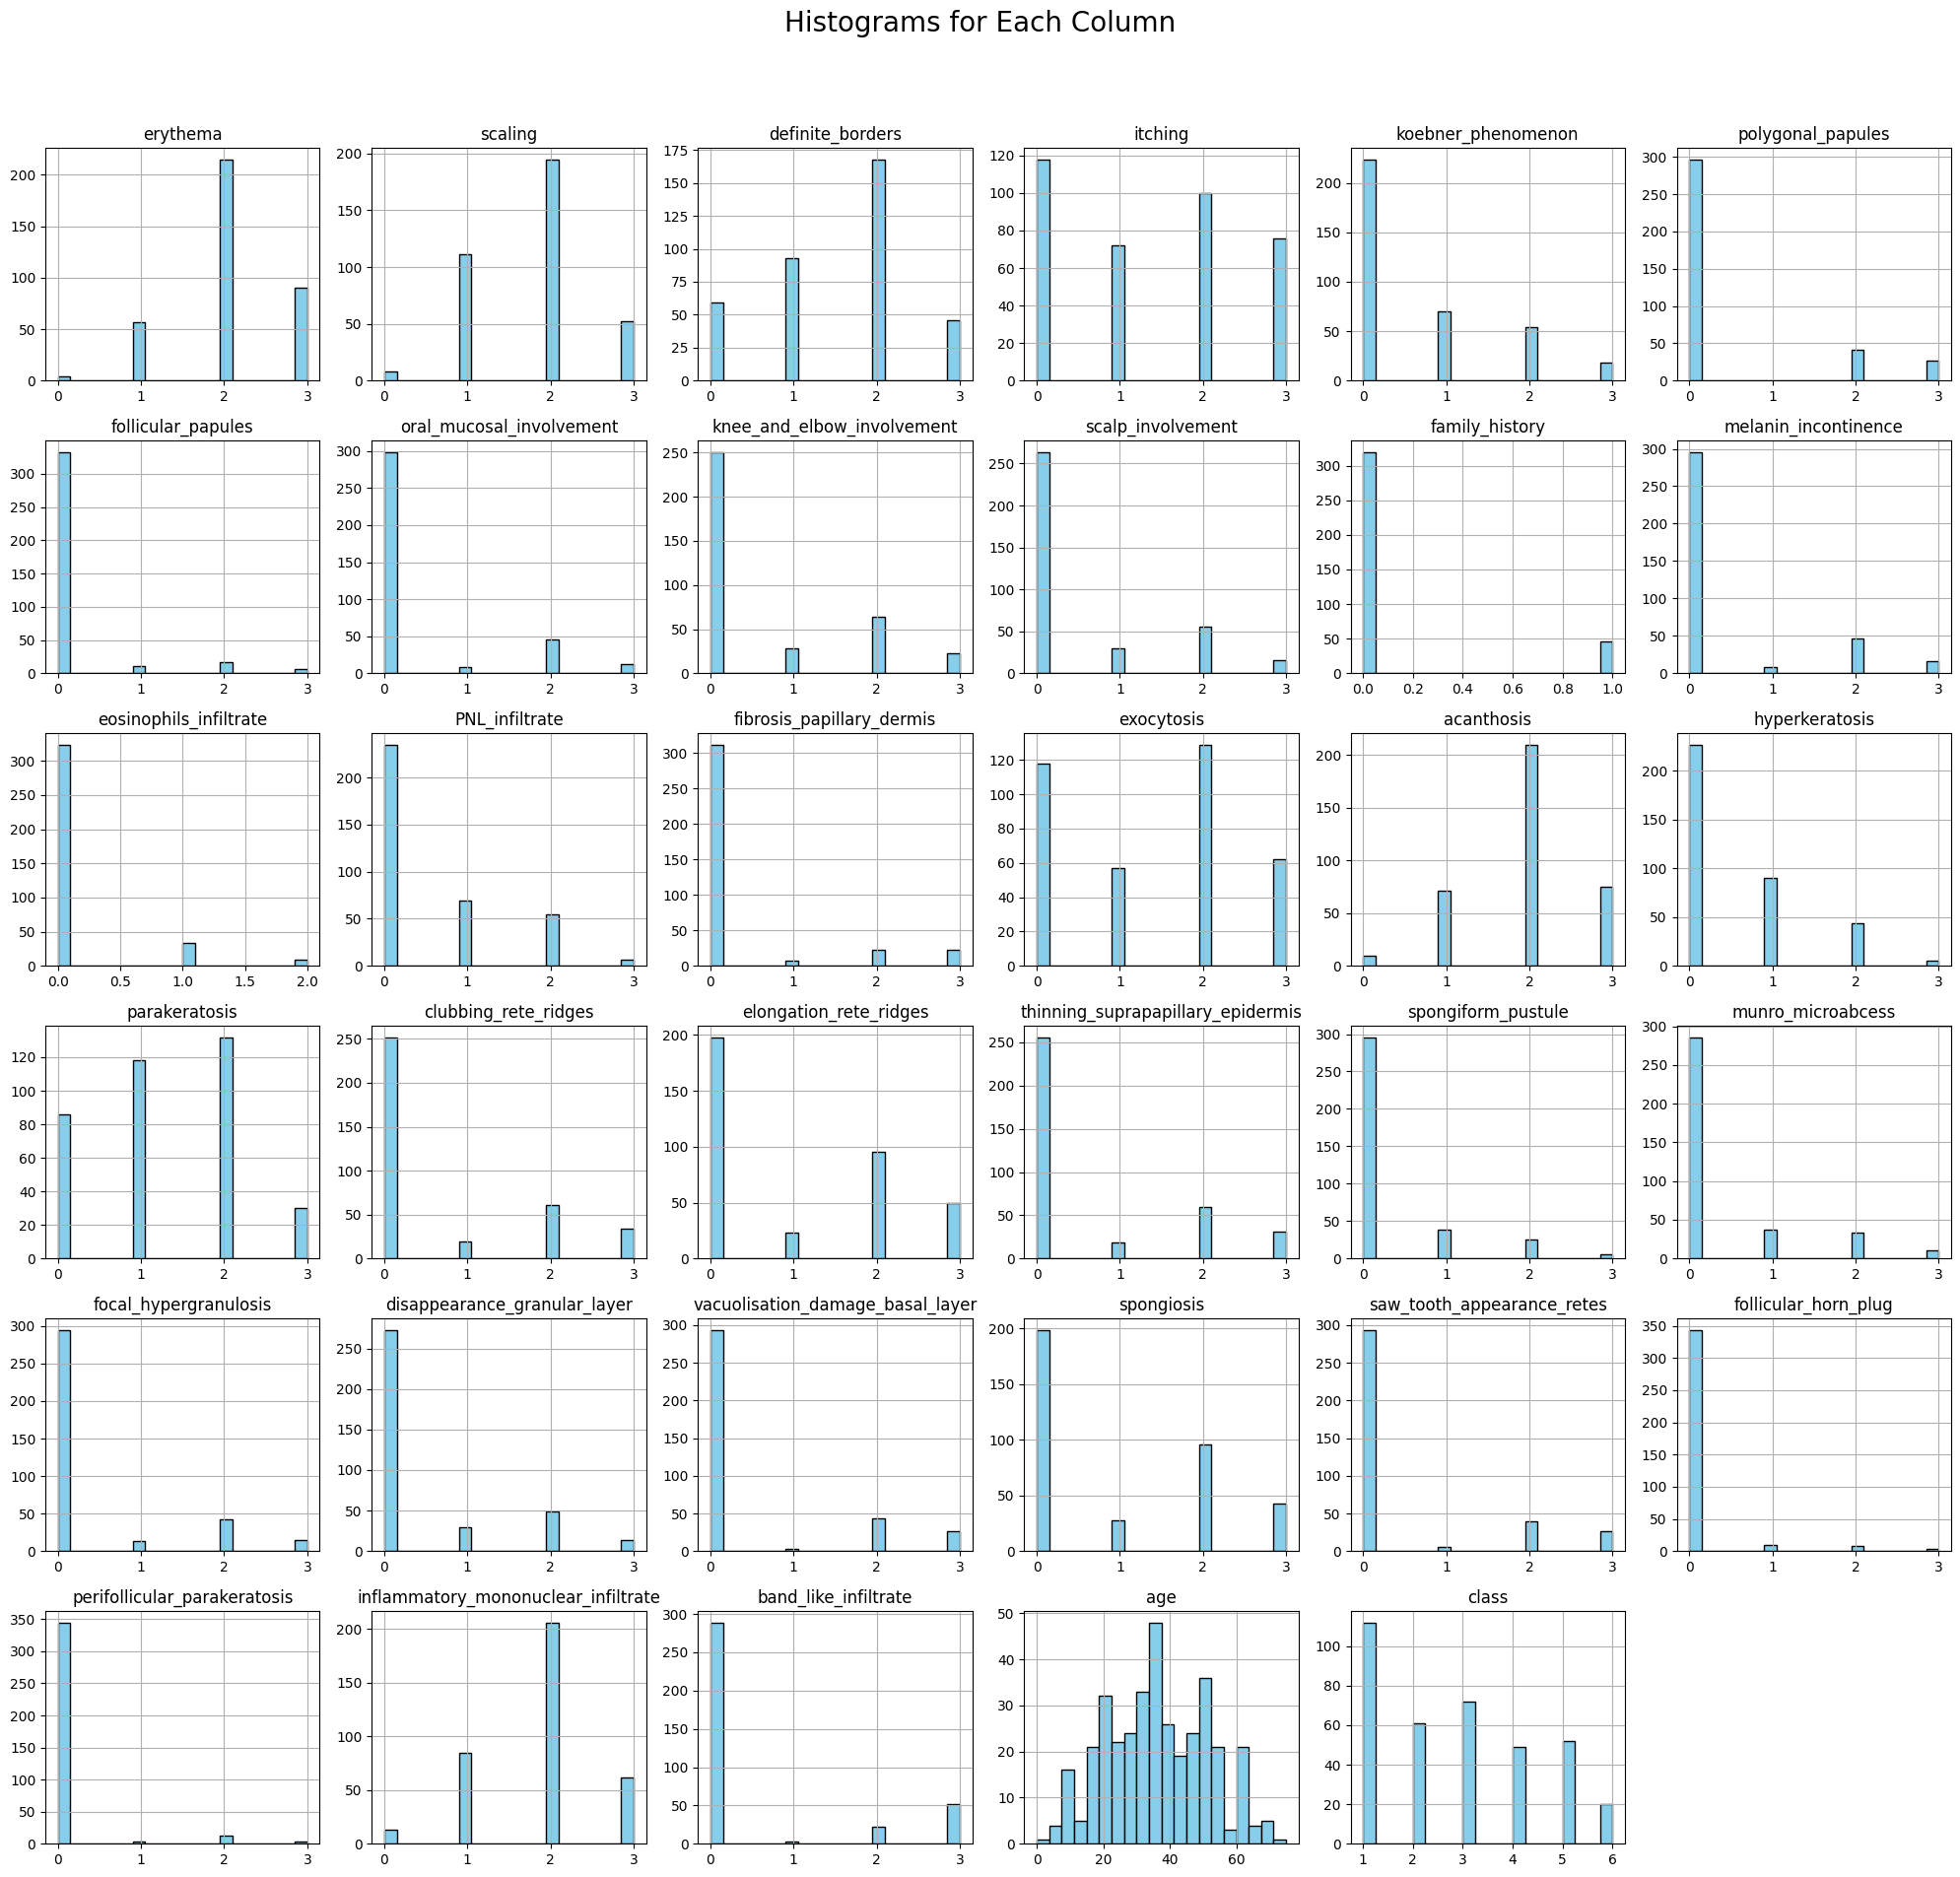

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "dermatology_database_1.csv"  # Update with your file path
data = pd.read_csv(file_path)


data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)

data.hist(bins=20, figsize=(20, 20), color='skyblue', edgecolor='black')
plt.suptitle("Histograms for Each Column", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
